# **Predicción de posibles robos en el juego de baseball**

---


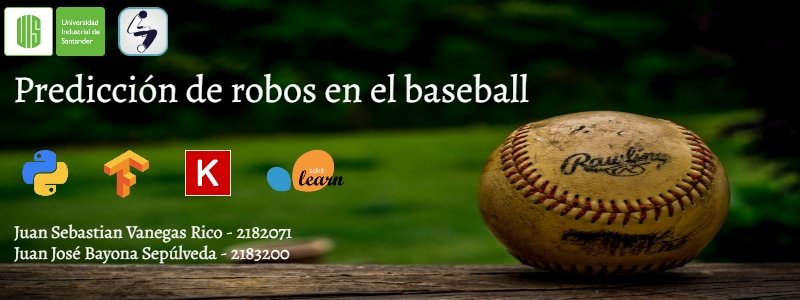

In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "PROYECTO IA" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/PROYECTO IA


### **Introducción**

El objetivo principal de este proyecto es descifrar las señales que se utilizan en el juego de baseball, esto con el fin de predecir cuando el otro equipo se dispone a robar. En el baseball las señales se usan como lenguaje no verbal de los couches hacia los jugadores, esto con el fin de confundir a los rivales sobre las posibles juagadas que se vayan a realizar. La función de los rivales es lograr interpretar esas señales a medida que avanza el juego, pero esto se complica ya que el cerebro humano no es muy bueno con los patrones. La Inteligencia artificial aparece como una forma de facilitar este proceso de predicción y lo mejor, en un tiempo más corto.   

In [ ]:
#@title **Load libs** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
from sklearn.datasets import *
sns.set_theme()
pd.__version__

'1.3.5'

In [ ]:
#@title **Se importa y se prepara el Dataset**
df=pd.read_csv("data_ia_proyecto_ABC.csv", sep=",")
print(df)
#df.shape

   Acc1 Acc2 Acc3 Acc4 Acc5 Acc6 Acc7 Acc8 Acc9 Acc10  ... Acc12 Acc13 Acc14  \
0     g    b    a    a    f    c    a    g    b     g  ...     d     j     i   
1     a    j    f    i    g    h    i    j    g     b  ...     c     i     b   
2     a    g    h    b    g    j    c    f    a     a  ...     a     g     c   
3     e    e    b    a    d    f    c    e    c     j  ...     j     h     e   
4     h    f    h    i    b    a    b    i    f     b  ...     f     g     e   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   ...   ...   ...   
95    g    i    a    e    j    f    h    d    c     d  ...     b     i     h   
96    d    i    j    e    f    g    b    b    i     h  ...     h     c     a   
97    d    d    a    g    g    g    f    f    g     f  ...     j     h     i   
98    d    g    f    h    h    h    f    a    i     c  ...     i     g     e   
99    a    i    b    e    c    a    h    j    b     b  ...     f     g     i   

   Acc15 Acc16 Acc17 Acc18 Acc19 Acc20 

In [ ]:
#@title **Se codifican las señas a numeros**
df = df.replace({"a": 0, "b": 1,"c": 2,"d": 3,"e": 4,"f": 5,"g": 6,"h": 7,"i": 8,"j": 9}) 
df.head()

#df.to_csv('data_ia_proyecto_Numbers.csv', index=False, encoding='utf-8') Guarda el data set con ese nombre

,Acc1,Acc2,Acc3,Acc4,Acc5,Acc6,Acc7,Acc8,Acc9,Acc10,...,Acc12,Acc13,Acc14,Acc15,Acc16,Acc17,Acc18,Acc19,Acc20,Resp
0,6,1,0,0,5,2,0,6,1,6,...,3,9,8,2,8,8,8,3,3,1
1,0,9,5,8,6,7,8,9,6,1,...,2,8,1,1,3,4,3,5,8,0
2,0,6,7,1,6,9,2,5,0,0,...,0,6,2,5,6,7,6,5,8,1
3,4,4,1,0,3,5,2,4,2,9,...,9,7,4,9,7,2,2,4,2,0
4,7,5,7,8,1,0,1,8,5,1,...,5,6,4,5,1,3,3,1,1,1


## **Particionamiento de datos**

In [ ]:
#@title **Code:** Se separan los datos del ground truth y se establecen las particiones de train y de test
from sklearn.model_selection import train_test_split
data = df.iloc[:,:-1]
data_y = df.Resp
X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size = 0.2, shuffle = False)
print("DONE!")

DONE!


## **Decision Tree Classifier**

In [ ]:
#@title **Code:** Se ejecuta DecisionTreeClassifier para conocer su efectividad en este caso
from sklearn.tree import DecisionTreeClassifier
estDT = DecisionTreeClassifier(max_depth=100,random_state=True)
estDT.fit(X_train,y_train)
print("Accuracy score:",accuracy_score(estDT.predict(X_test), y_test))

Accuracy score: 0.35


## **Support vector machine classification (SVM)**

In [ ]:
#@title **Code** Se ejecuta SVM classification para conocer su efectividad en este caso
from sklearn.svm import SVC

estSVC = SVC()
estSVC.fit(X_train,y_train)
print("TRAIN: ",accuracy_score(estSVC.predict(X_train), y_train))
print("TEST: ",accuracy_score(estSVC.predict(X_test), y_test))

TRAIN:  0.975
TEST:  0.6


## **Red Neuronal**

In [ ]:
#@title **Code:** Se ejecuta una Red Neuronal para conocer la efectividad de este metodo para este caso
import numpy as np
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(21)
np.random.seed(21)
nclasses = [len(np.unique(y_test))]
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
dnn1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = X_train[1].shape),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(nclasses[0], activation='sigmoid')
])
#dnn1.summary()
#print(nclasses)
#X_train.shape
dnn1.compile(optimizer=tf.keras.optimizers.SGD(), 
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


history = dnn1.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))
scores = dnn1.evaluate(X_test, y_test)
yest = dnn1.predict(X_test)
yest = np.argmax(dnn1.predict(X_test),axis=1)
X_train.shape
print(history, scores, yest)
print("Accuracy Score: ",scores[1])

Epoch 1/30
3/3 [==============================] - 1s 120ms/step - loss: 0.6978 - accuracy: 0.4875 - val_loss: 0.6965 - val_accuracy: 0.5500
Epoch 2/30
3/3 [==============================] - 0s 24ms/step - loss: 0.6924 - accuracy: 0.5500 - val_loss: 0.6961 - val_accuracy: 0.5500
Epoch 3/30
3/3 [==============================] - 0s 21ms/step - loss: 0.6900 - accuracy: 0.5125 - val_loss: 0.6954 - val_accuracy: 0.5500
Epoch 4/30
3/3 [==============================] - 0s 22ms/step - loss: 0.6802 - accuracy: 0.5750 - val_loss: 0.7011 - val_accuracy: 0.4500
Epoch 5/30
3/3 [==============================] - 0s 22ms/step - loss: 0.6750 - accuracy: 0.6875 - val_loss: 0.6986 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 0s 22ms/step - loss: 0.6704 - accuracy: 0.7375 - val_loss: 0.7023 - val_accuracy: 0.4500
Epoch 7/30
3/3 [==============================] - 0s 34ms/step - loss: 0.6670 - accuracy: 0.7125 - val_loss: 0.7044 - val_accuracy: 0.3500
Epoch 8/30
3/3 [==========

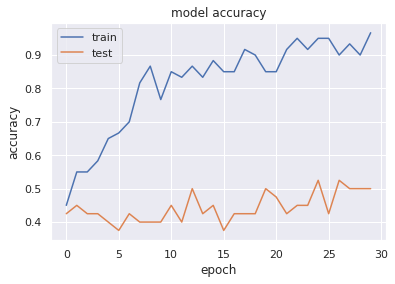

In [ ]:
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')

## **Gaussian NaiveBayes**

In [ ]:
#@title **Code:** Se ejecuta Gaussian NaivBayes para conocer su efectividad en este caso
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
estNB = GaussianNB()
print(X_train.shape, y_train.shape)
estNB.fit(X_train,y_train)
predictions = estNB.predict(X_test)
print( "first 100 predictions", predictions[:100])
print( "first 100 targets    ", y_train[:100])
print("Accuracy Score:","%.3f"%accuracy_score(predictions, y_test))

(80, 20) (80,)
first 100 predictions [0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0]
first 100 targets     0     1
1     0
2     1
3     0
4     1
     ..
75    0
76    1
77    0
78    1
79    0
Name: Resp, Length: 80, dtype: int64
Accuracy Score: 0.650


## **Random Forest**

In [ ]:
#@title **Code:** Se ejecuta el metodo Random Forest para conocer su efectividad en este caso
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
estRF = RandomForestClassifier(n_estimators=350,random_state=True)
estRF.fit(X_train,y_train)
print("Accuracy score:",accuracy_score(estRF.predict(X_test), y_test))

Accuracy score: 0.75


## **Cross-Validation**

In [ ]:
#@title **Code** Se ejecuta Cross Validation para conocer su efectividad en este caso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

s = cross_val_score(estSVC, data, data_y, cv=KFold(10, shuffle=False), scoring=make_scorer(accuracy_score))
print("accuracy SVC %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(estDT, data, data_y, cv=KFold(10, shuffle=False), scoring=make_scorer(accuracy_score))
print("accuracy DT %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(estNB, data, data_y, cv=KFold(10, shuffle=False), scoring=make_scorer(accuracy_score))
print("accuracy NB %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(estRF, data, data_y, cv=KFold(10, shuffle=False), scoring=make_scorer(accuracy_score))
print("accuracy RF %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
print("Solo se aprecia una mejora en el metodo de Decision Tree :(\n El mayor acurracy esta dado por el metodo de Random Forest :)" )

accuracy SVC 0.540 (+/- 0.22000)
accuracy DT 0.510 (+/- 0.18138)
accuracy NB 0.540 (+/- 0.21541)
accuracy RF 0.610 (+/- 0.13000)
Solo se aprecia una mejora en el metodo de Decision Tree :(
 El mayor acurracy esta dado por el metodo de Random Forest :)
